In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Medicaldataset.csv")

In [3]:
df['Result'] = df['Result'].map({'positive': 1, 'negative': 0})

In [4]:
print(df.isnull().sum())

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


In [5]:
df.dropna(inplace=True)

In [6]:
X = df.drop("Result", axis=1)
y = df["Result"]

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
model.score(X_train, y_train)*100

100.0

In [16]:
y_pred = model.predict(X_test)
model.score(X_test,y_pred)*100

100.0

In [18]:
from sklearn.metrics import confusion_matrix

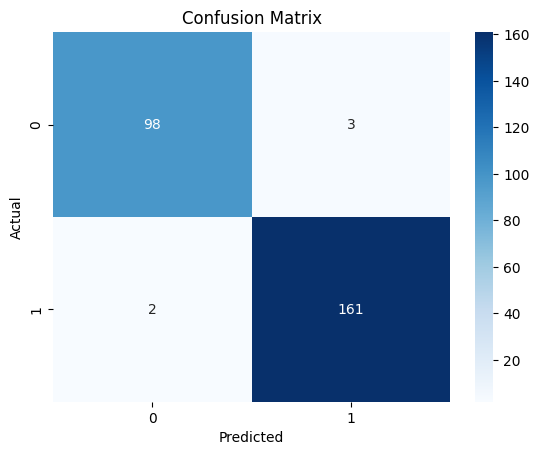

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig('Confusion Matrix')
plt.show()